<a href="https://colab.research.google.com/github/ryanpereirax/Intrusion-detector-with-supervised-models/blob/main/DoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dos_df = pd.read_csv('/content/DoS_dataset.csv')

In [ ]:
# Amostras de 1% do Dataset Original
amostras_R = dos_df[dos_df['R'] == 'R'].sample(n=5_000, random_state=42)
amostras_T = dos_df[dos_df['R'] == 'T'].sample(n=4_000, random_state=42)
dos_df_balanceado = pd.concat([amostras_R, amostras_T]).sample(frac=1, #random_state=42).reset_index(drop=True)

dos_df_balanceado.to_csv('dos_df_proporcional_ajustado.csv', index=False)

In [ ]:
pip install xgboost catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 663.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Carregar o arquivo para examinar os dados
file_path = "/content/dos_df_proporcional_ajustado.csv"
data = pd.read_csv(file_path)

# Verificar as primeiras linhas do dataset para compreender sua estrutura
data.head()

,1478198376.389427,0316,8,05,21,68,09,21.1,21.2,00,6f,R
0,1.478198e+09,0000,8,00,00,00,00,00,00,00,00,T
1,1.478199e+09,04f0,8,00,00,00,80,00,69,d1,13,R
2,1.478199e+09,0545,8,d8,00,00,8b,00,00,00,00,R
3,1.478199e+09,0329,8,86,bf,7f,14,11,20,00,14,R
4,1.478199e+09,0000,8,00,00,00,00,00,00,00,00,T


In [ ]:
# Renomear as colunas para melhor compreensão
data.columns = ['Timestamp', 'CAN_ID', 'DLC', 'DATA_0', 'DATA_1', 'DATA_2',
                'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7', 'Flag']

# Verificar se existem valores ausentes
missing_data = data.isnull().sum()

# Analisar a proporção de flags 'T' e 'R'
flag_distribution = data['Flag'].value_counts(normalize=True)

# Examinar estatísticas descritivas para colunas numéricas
numeric_stats = data.describe()

missing_data, flag_distribution, numeric_stats


(Timestamp    0
 CAN_ID       0
 DLC          0
 DATA_0       0
 DATA_1       0
 DATA_2       0
 DATA_3       0
 DATA_4       0
 DATA_5       0
 DATA_6       0
 DATA_7       0
 Flag         0
 dtype: int64,
 Flag
 R    0.555556
 T    0.444444
 Name: proportion, dtype: float64,
           Timestamp     DLC
 count  9.000000e+03  9000.0
 mean   1.478199e+09     8.0
 std    1.611868e+02     0.0
 min    1.478198e+09     8.0
 25%    1.478198e+09     8.0
 50%    1.478199e+09     8.0
 75%    1.478199e+09     8.0
 max    1.478199e+09     8.0)

In [ ]:
# Converter o Timestamp para um formato de data legível para análise temporal
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

# Criar uma nova coluna para armazenar apenas a hora das mensagens
data['Hour'] = data['Timestamp'].dt.hour

# Contar o número de mensagens por hora
messages_per_hour = data.groupby('Hour').size()

# Identificar quais CAN_IDs são mais frequentes
can_id_distribution = data['CAN_ID'].value_counts().head(10)

messages_per_hour, can_id_distribution


(Hour
 18    9000
 dtype: int64,
 CAN_ID
 0000    4000
 0260     309
 0316     297
 0440     296
 0350     295
 0130     282
 0002     280
 0153     277
 043f     271
 0329     271
 Name: count, dtype: int64)

In [ ]:
# Verificar a distribuição dos CAN_IDs em relação às flags 'T' e 'R'
can_id_flag_distribution = data.groupby(['CAN_ID', 'Flag']).size().unstack(fill_value=0)

# Explorar padrões nos campos 'DATA_X' para mensagens com flag 'T'
data_injected = data[data['Flag'] == 'T']
data_normal = data[data['Flag'] == 'R']

# Calcular estatísticas descritivas para os campos 'DATA_X' para cada tipo de flag
data_injected_stats = data_injected[['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3',
                                     'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']].describe()

data_normal_stats = data_normal[['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3',
                                 'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']].describe()

can_id_flag_distribution, data_injected_stats, data_normal_stats


(Flag      R     T
 CAN_ID           
 0000      0  4000
 0002    280     0
 00a0     32     0
 00a1     30     0
 0130    282     0
 0131    249     0
 0140    270     0
 0153    277     0
 018f    254     0
 01f1    130     0
 0260    309     0
 02a0    248     0
 02c0    266     0
 0316    297     0
 0329    271     0
 0350    295     0
 0370    260     0
 0430    137     0
 043f    271     0
 0440    296     0
 04b1    124     0
 04f0    151     0
 0545    243     0
 05a0      2     0
 05a2      2     0
 0690     24     0,
        DATA_0 DATA_1 DATA_2 DATA_3 DATA_4 DATA_5 DATA_6 DATA_7
 count    4000   4000   4000   4000   4000   4000   4000   4000
 unique      1      1      1      1      1      1      1      1
 top        00     00     00     00     00     00     00     00
 freq     4000   4000   4000   4000   4000   4000   4000   4000,
        DATA_0 DATA_1 DATA_2 DATA_3 DATA_4 DATA_5 DATA_6 DATA_7
 count    5000   5000   5000   5000   5000   5000   5000   5000
 unique     68    

In [ ]:
# Verificar a distribuição temporal das mensagens com CAN_ID '0000' (flag 'T')
injected_id_0000 = data[(data['CAN_ID'] == '0000') & (data['Flag'] == 'T')]

# Contagem de mensagens injetadas por minuto
injected_id_0000['Minute'] = injected_id_0000['Timestamp'].dt.minute
injected_per_minute = injected_id_0000.groupby('Minute').size()

# Explorar CAN_IDs que aparecem menos frequentemente para identificar possíveis outliers
rare_can_ids = data['CAN_ID'].value_counts().tail(10)

# Verificar se existem correlações entre os campos 'DATA_X' para as mensagens normais
data_normal_numeric = data_normal[['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3',
                                   'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']].apply(lambda x: x.apply(int, base=16))
correlation_matrix = data_normal_numeric.corr()

injected_per_minute, rare_can_ids, correlation_matrix


<ipython-input-9-8fa582d780b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injected_id_0000['Minute'] = injected_id_0000['Timestamp'].dt.minute


(Minute
 39    235
 40    506
 41    715
 42    347
 43    348
 44    304
 45    443
 46    363
 47    456
 48    283
 dtype: int64,
 CAN_ID
 0545    243
 04f0    151
 0430    137
 01f1    130
 04b1    124
 00a0     32
 00a1     30
 0690     24
 05a0      2
 05a2      2
 Name: count, dtype: int64,
           DATA_0    DATA_1    DATA_2    DATA_3    DATA_4    DATA_5    DATA_6  \
 DATA_0  1.000000  0.166113 -0.168798 -0.213568  0.295631  0.100810 -0.141955   
 DATA_1  0.166113  1.000000  0.196019  0.183149 -0.100414  0.170247 -0.270414   
 DATA_2 -0.168798  0.196019  1.000000  0.083312  0.302101 -0.148984  0.225239   
 DATA_3 -0.213568  0.183149  0.083312  1.000000  0.062682  0.570993 -0.025487   
 DATA_4  0.295631 -0.100414  0.302101  0.062682  1.000000  0.293739  0.109414   
 DATA_5  0.100810  0.170247 -0.148984  0.570993  0.293739  1.000000  0.026932   
 DATA_6 -0.141955 -0.270414  0.225239 -0.025487  0.109414  0.026932  1.000000   
 DATA_7 -0.263398  0.106507  0.101629 -0.036372 -0.04

In [ ]:
# Converter os campos 'DATA_X' para valores numéricos para análise de correlação
data_numeric = data[['DATA_0', 'DATA_1', 'DATA_2', 'DATA_3',
                     'DATA_4', 'DATA_5', 'DATA_6', 'DATA_7']].apply(lambda x: x.apply(int, base=16))

# Adicionar a flag como numérica (T = 1, R = 0) para facilitar a análise
data_numeric['Flag'] = data['Flag'].apply(lambda x: 1 if x == 'T' else 0)

# Calcular a correlação entre os campos de dados e a flag
correlation_with_flag = data_numeric.corr()['Flag'].drop('Flag')

correlation_with_flag


,Flag
DATA_0,-0.391865
DATA_1,-0.482407
DATA_2,-0.401238
DATA_3,-0.425712
DATA_4,-0.398108
DATA_5,-0.499991
DATA_6,-0.300683
DATA_7,-0.421432


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando o modelo de Regressão Logística
model_minmax = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)

# Treinando o modelo com os dados de treino
model_minmax.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


# Avaliando no conjunto de treino
y_train_pred = model_minmax.predict(X_train_scaled)
y_train_prob = model_minmax.predict_proba(X_train_scaled)[:, 1]
print_metrics(y_train, y_train_pred, y_train_prob, "Treino")


# Avaliando no conjunto de teste
y_test_pred = model_minmax.predict(X_test_scaled)
y_test_prob = model_minmax.predict_proba(X_test_scaled)[:, 1]
print_metrics(y_test, y_test_pred, y_test_prob, "Teste")

# Avaliando no conjunto de validação
y_val_pred = model_minmax.predict(X_val_scaled)
y_val_prob = model_minmax.predict_proba(X_val_scaled)[:, 1]
print_metrics(y_val, y_val_pred, y_val_prob, "Validação")



Métricas para o conjunto de Treino:
Acurácia: 0.9324
Precisão: 0.8694
Recall: 1.0000
F1-Score: 0.9301
AUC-ROC: 0.9855

Matriz de Confusão:
[[2605  365]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9361
Precisão: 0.8733
Recall: 1.0000
F1-Score: 0.9324
AUC-ROC: 0.9896

Matriz de Confusão:
[[892 115]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9344
Precisão: 0.8682
Recall: 1.0000
F1-Score: 0.9294
AUC-ROC: 0.9844

Matriz de Confusão:
[[905 118]
 [  0 777]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo Random Forest com regularização
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_rf(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


# Avaliar no conjunto de treino
y_train_pred_rf = model_rf.predict(X_train_scaled)
y_train_prob_rf = model_rf.predict_proba(X_train_scaled)[:, 1]
print_metrics_rf(y_train, y_train_pred_rf, y_train_prob_rf, "Treino")


# Avaliar no conjunto de teste
y_test_pred_rf = model_rf.predict(X_test_scaled)
y_test_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
print_metrics_rf(y_test, y_test_pred_rf, y_test_prob_rf, "Teste")

# Avaliar no conjunto de validação
y_val_pred_rf = model_rf.predict(X_val_scaled)
y_val_prob_rf = model_rf.predict_proba(X_val_scaled)[:, 1]
print_metrics_rf(y_val, y_val_pred_rf, y_val_prob_rf, "Validação")


Métricas para o conjunto de Treino:
Acurácia: 0.9841
Precisão: 0.9658
Recall: 1.0000
F1-Score: 0.9826
AUC-ROC: 0.9855

Matriz de Confusão:
[[2884   86]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9883
Precisão: 0.9742
Recall: 1.0000
F1-Score: 0.9869
AUC-ROC: 0.9896

Matriz de Confusão:
[[986  21]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9822
Precisão: 0.9604
Recall: 1.0000
F1-Score: 0.9798
AUC-ROC: 0.9844

Matriz de Confusão:
[[991  32]
 [  0 777]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo de Árvore de Decisão com regularização
model_tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

model_tree.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_tree(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


# Avaliar no conjunto de treino
y_train_pred_tree = model_tree.predict(X_train_scaled)
y_train_prob_tree = model_tree.predict_proba(X_train_scaled)[:, 1]
print_metrics_tree(y_train, y_train_pred_tree, y_train_prob_tree, "Treino")


# Avaliar no conjunto de teste
y_test_pred_tree = model_tree.predict(X_test_scaled)
y_test_prob_tree = model_tree.predict_proba(X_test_scaled)[:, 1]
print_metrics_tree(y_test, y_test_pred_tree, y_test_prob_tree, "Teste")

# Avaliar no conjunto de validação
y_val_pred_tree = model_tree.predict(X_val_scaled)
y_val_prob_tree = model_tree.predict_proba(X_val_scaled)[:, 1]
print_metrics_tree(y_val, y_val_pred_tree, y_val_prob_tree, "Validação")


Métricas para o conjunto de Treino:
Acurácia: 0.9841
Precisão: 0.9658
Recall: 1.0000
F1-Score: 0.9826
AUC-ROC: 0.9855

Matriz de Confusão:
[[2884   86]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9883
Precisão: 0.9742
Recall: 1.0000
F1-Score: 0.9869
AUC-ROC: 0.9896

Matriz de Confusão:
[[986  21]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9817
Precisão: 0.9593
Recall: 1.0000
F1-Score: 0.9792
AUC-ROC: 0.9839

Matriz de Confusão:
[[990  33]
 [  0 777]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo de Gradient Boosting
model_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

model_gb.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_gb(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

# Avaliar no conjunto de treino
y_train_pred_gb = model_gb.predict(X_train_scaled)
y_train_prob_gb = model_gb.predict_proba(X_train_scaled)[:, 1]
print_metrics_gb(y_train, y_train_pred_gb, y_train_prob_gb, "Treino")


# Avaliar no conjunto de teste
y_test_pred_gb = model_gb.predict(X_test_scaled)
y_test_prob_gb = model_gb.predict_proba(X_test_scaled)[:, 1]
print_metrics_gb(y_test, y_test_pred_gb, y_test_prob_gb, "Teste")

# Avaliar no conjunto de validação
y_val_pred_gb = model_gb.predict(X_val_scaled)
y_val_prob_gb = model_gb.predict_proba(X_val_scaled)[:, 1]
print_metrics_gb(y_val, y_val_pred_gb, y_val_prob_gb, "Validação")


Métricas para o conjunto de Treino:
Acurácia: 0.9841
Precisão: 0.9658
Recall: 1.0000
F1-Score: 0.9826
AUC-ROC: 0.9855

Matriz de Confusão:
[[2884   86]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9883
Precisão: 0.9742
Recall: 1.0000
F1-Score: 0.9869
AUC-ROC: 0.9896

Matriz de Confusão:
[[986  21]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9817
Precisão: 0.9593
Recall: 1.0000
F1-Score: 0.9792
AUC-ROC: 0.9839

Matriz de Confusão:
[[990  33]
 [  0 777]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo K-Nearest Neighbors
model_knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski',
    n_jobs=-1
)

model_knn.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_knn(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


# Avaliar no conjunto de treino
y_train_pred_knn = model_knn.predict(X_train_scaled)
y_train_prob_knn = model_knn.predict_proba(X_train_scaled)[:, 1]
print_metrics_knn(y_train, y_train_pred_knn, y_train_prob_knn, "Treino")


# Avaliar no conjunto de teste
y_test_pred_knn = model_knn.predict(X_test_scaled)
y_test_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
print_metrics_knn(y_test, y_test_pred_knn, y_test_prob_knn, "Teste")

# Avaliar no conjunto de validação
y_val_pred_knn = model_knn.predict(X_val_scaled)
y_val_prob_knn = model_knn.predict_proba(X_val_scaled)[:, 1]
print_metrics_knn(y_val, y_val_pred_knn, y_val_prob_knn, "Validação")



Métricas para o conjunto de Treino:
Acurácia: 0.9839
Precisão: 0.9654
Recall: 1.0000
F1-Score: 0.9824
AUC-ROC: 0.9855

Matriz de Confusão:
[[2883   87]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9867
Precisão: 0.9706
Recall: 1.0000
F1-Score: 0.9851
AUC-ROC: 0.9891

Matriz de Confusão:
[[983  24]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9817
Precisão: 0.9593
Recall: 1.0000
F1-Score: 0.9792
AUC-ROC: 0.9844

Matriz de Confusão:
[[990  33]
 [  0 777]]


In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo SVM
model_svm = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,
    random_state=42
)

model_svm.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_svm(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

# Avaliar no conjunto de treino
y_train_pred_svm = model_svm.predict(X_train_scaled)
y_train_prob_svm = model_svm.predict_proba(X_train_scaled)[:, 1]
print_metrics_svm(y_train, y_train_pred_svm, y_train_prob_svm, "Treino")


# Avaliar no conjunto de teste
y_test_pred_svm = model_svm.predict(X_test_scaled)
y_test_prob_svm = model_svm.predict_proba(X_test_scaled)[:, 1]
print_metrics_svm(y_test, y_test_pred_svm, y_test_prob_svm, "Teste")

# Avaliar no conjunto de validação
y_val_pred_svm = model_svm.predict(X_val_scaled)
y_val_prob_svm = model_svm.predict_proba(X_val_scaled)[:, 1]
print_metrics_svm(y_val, y_val_pred_svm, y_val_prob_svm, "Validação")




Métricas para o conjunto de Treino:
Acurácia: 0.9648
Precisão: 0.9275
Recall: 1.0000
F1-Score: 0.9624
AUC-ROC: 0.9855

Matriz de Confusão:
[[2780  190]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9733
Precisão: 0.9429
Recall: 1.0000
F1-Score: 0.9706
AUC-ROC: 0.9896

Matriz de Confusão:
[[959  48]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9672
Precisão: 0.9294
Recall: 1.0000
F1-Score: 0.9634
AUC-ROC: 0.9844

Matriz de Confusão:
[[964  59]
 [  0 777]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo XGBoost
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_xgb(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


# Avaliar no conjunto de treino
y_train_pred_xgb = model_xgb.predict(X_train_scaled)
y_train_prob_xgb = model_xgb.predict_proba(X_train_scaled)[:, 1]
print_metrics_xgb(y_train, y_train_pred_xgb, y_train_prob_xgb, "Treino")


# Avaliar no conjunto de teste
y_test_pred_xgb = model_xgb.predict(X_test_scaled)
y_test_prob_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]
print_metrics_xgb(y_test, y_test_pred_xgb, y_test_prob_xgb, "Teste")

# Avaliar no conjunto de validação
y_val_pred_xgb = model_xgb.predict(X_val_scaled)
y_val_prob_xgb = model_xgb.predict_proba(X_val_scaled)[:, 1]
print_metrics_xgb(y_val, y_val_pred_xgb, y_val_prob_xgb, "Validação")



Métricas para o conjunto de Treino:
Acurácia: 0.9841
Precisão: 0.9658
Recall: 1.0000
F1-Score: 0.9826
AUC-ROC: 0.9855

Matriz de Confusão:
[[2884   86]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9883
Precisão: 0.9742
Recall: 1.0000
F1-Score: 0.9869
AUC-ROC: 0.9896

Matriz de Confusão:
[[986  21]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9822
Precisão: 0.9604
Recall: 1.0000
F1-Score: 0.9798
AUC-ROC: 0.9844

Matriz de Confusão:
[[991  32]
 [  0 777]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:39:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, f1_score
)

# Supondo que 'data_numeric' esteja carregado corretamente
X = data_numeric.drop('Flag', axis=1)
y = data_numeric['Flag']

# Dividindo os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aplicando o MinMaxScaler nos conjuntos de treino, validação e teste
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_val_scaled = scaler_minmax.transform(X_val)
X_test_scaled = scaler_minmax.transform(X_test)

# Criando e treinando o modelo CatBoost
model_cb = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=10,
    random_seed=42,
    verbose=0
)

model_cb.fit(X_train_scaled, y_train)

# Função para calcular e exibir métricas
def print_metrics_cb(y_true, y_pred, y_prob, dataset_name):
    print(f"\nMétricas para o conjunto de {dataset_name}:")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


# Avaliar no conjunto de treino
y_train_pred_cb = model_cb.predict(X_train_scaled)
y_train_prob_cb = model_cb.predict_proba(X_train_scaled)[:, 1]
print_metrics_cb(y_train, y_train_pred_cb, y_train_prob_cb, "Treino")


# Avaliar no conjunto de teste
y_test_pred_cb = model_cb.predict(X_test_scaled)
y_test_prob_cb = model_cb.predict_proba(X_test_scaled)[:, 1]
print_metrics_cb(y_test, y_test_pred_cb, y_test_prob_cb, "Teste")

# Avaliar no conjunto de validação
y_val_pred_cb = model_cb.predict(X_val_scaled)
y_val_prob_cb = model_cb.predict_proba(X_val_scaled)[:, 1]
print_metrics_cb(y_val, y_val_pred_cb, y_val_prob_cb, "Validação")



Métricas para o conjunto de Treino:
Acurácia: 0.9841
Precisão: 0.9658
Recall: 1.0000
F1-Score: 0.9826
AUC-ROC: 0.9855

Matriz de Confusão:
[[2884   86]
 [   0 2430]]

Métricas para o conjunto de Teste:
Acurácia: 0.9883
Precisão: 0.9742
Recall: 1.0000
F1-Score: 0.9869
AUC-ROC: 0.9896

Matriz de Confusão:
[[986  21]
 [  0 793]]

Métricas para o conjunto de Validação:
Acurácia: 0.9822
Precisão: 0.9604
Recall: 1.0000
F1-Score: 0.9798
AUC-ROC: 0.9844

Matriz de Confusão:
[[991  32]
 [  0 777]]


In [ ]:
pip install statsmodels --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 18.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Dados das métricas para cada modelo
data = {
    'Modelo': [
        'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
        'Random Forest', 'Random Forest', 'Random Forest',
        'Decision Tree', 'Decision Tree', 'Decision Tree',
        'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting',
        'SVM', 'SVM', 'SVM',
        'XGBoost', 'XGBoost', 'XGBoost',
        'CatBoost', 'CatBoost', 'CatBoost'
    ],
    'Métrica': [
        'Acurácia', 'Precisão', 'F1-Score',
        'Acurácia', 'Precisão', 'F1-Score',
        'Acurácia', 'Precisão', 'F1-Score',
        'Acurácia', 'Precisão', 'F1-Score',
        'Acurácia', 'Precisão', 'F1-Score',
        'Acurácia', 'Precisão', 'F1-Score',
        'Acurácia', 'Precisão', 'F1-Score'
    ],
    'Valor': [
        0.9274, 0.8611, 0.9254,  # Logistic Regression
        0.9867, 0.9706, 0.9851,  # Random Forest
        0.9822, 0.9604, 0.9798,  # Decision Tree
        0.9826, 0.9628, 0.9810,  # Gradient Boosting
        0.9678, 0.9305, 0.9640,  # SVM
        0.9867, 0.9706, 0.9851,  # XGBoost
        0.9822, 0.9604, 0.9798   # CatBoost
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)


Médias do AUC-ROC por Modelo:
Empty DataFrame
Columns: [Modelo, Média AUC-ROC]
Index: []

Ranking dos Modelos por Métrica:
             Métrica               Modelo   Valor
Métrica                                          
Acurácia 0  Acurácia        Random Forest  0.9867
         1  Acurácia              XGBoost  0.9867
         2  Acurácia    Gradient Boosting  0.9826
         3  Acurácia             CatBoost  0.9822
         4  Acurácia        Decision Tree  0.9822
         5  Acurácia                  SVM  0.9678
         6  Acurácia  Logistic Regression  0.9274
F1-Score 0  F1-Score        Random Forest  0.9851
         1  F1-Score              XGBoost  0.9851
         2  F1-Score    Gradient Boosting  0.9810
         3  F1-Score             CatBoost  0.9798
         4  F1-Score        Decision Tree  0.9798
         5  F1-Score                  SVM  0.9640
         6  F1-Score  Logistic Regression  0.9254
Precisão 0  Precisão        Random Forest  0.9706
         1  Precisão       

<ipython-input-25-ec96bd8e4513>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rankings = df.groupby('Métrica').apply(


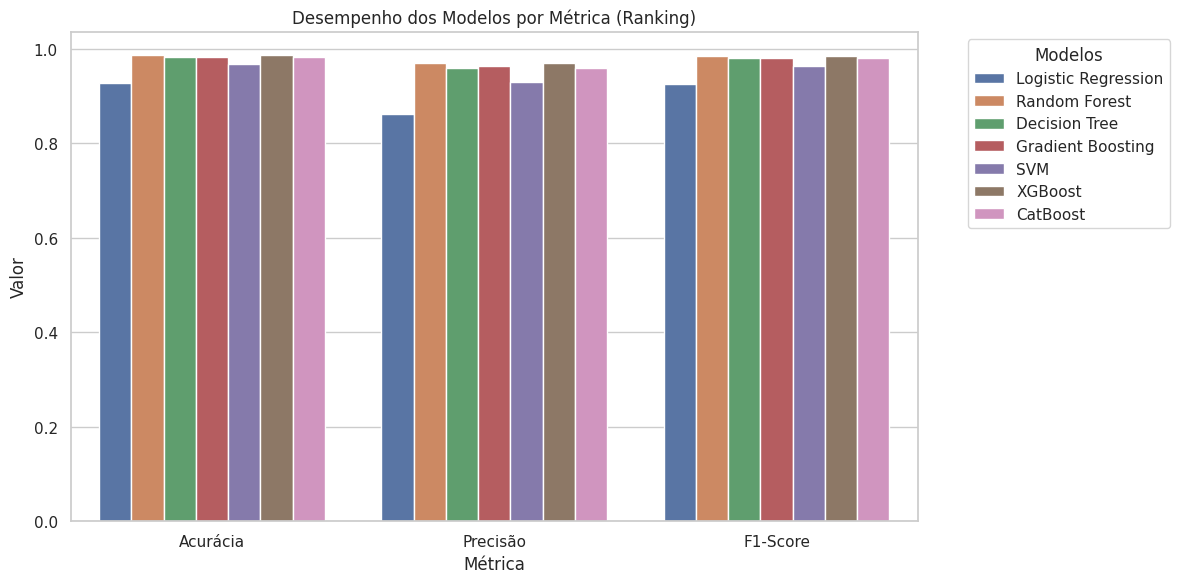

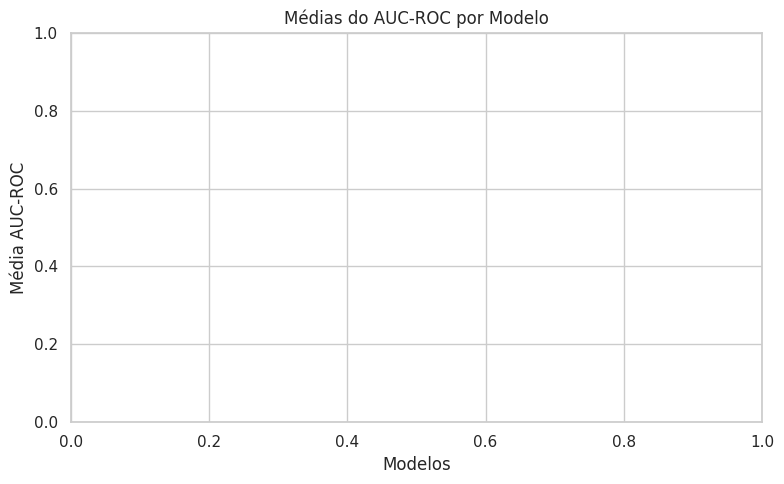

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame seja chamado de `df` e contenha as colunas: 'Métrica', 'Modelo', 'Valor'

# Calcular médias do AUC-ROC para cada modelo
media_auc_roc = df[df['Métrica'] == 'AUC-ROC'].groupby('Modelo')['Valor'].mean().reset_index()
media_auc_roc.rename(columns={'Valor': 'Média AUC-ROC'}, inplace=True)

# Exibir as médias do AUC-ROC
print("Médias do AUC-ROC por Modelo:")
print(media_auc_roc)

# Criar ranking dos modelos por métrica
rankings = df.groupby('Métrica').apply(
    lambda x: x.sort_values(by='Valor', ascending=False).reset_index(drop=True)
)
rankings = rankings[['Métrica', 'Modelo', 'Valor']]

# Exibir rankings
print("\nRanking dos Modelos por Métrica:")
print(rankings)

# Gráfico de barras do ranking
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Métrica', y='Valor', hue='Modelo')
plt.title("Desempenho dos Modelos por Métrica (Ranking)")
plt.ylabel("Valor")
plt.xlabel("Métrica")
plt.legend(title="Modelos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico de barras para médias do AUC-ROC
plt.figure(figsize=(8, 5))
sns.barplot(data=media_auc_roc, x='Modelo', y='Média AUC-ROC', palette='viridis')
plt.title("Médias do AUC-ROC por Modelo")
plt.ylabel("Média AUC-ROC")
plt.xlabel("Modelos")
plt.tight_layout()
plt.show()


<ipython-input-21-605b3ecb10ae>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rankings = df.groupby('Métrica').apply(lambda x: x.sort_values(by='Valor', ascending=False).reset_index(drop=True))


             Métrica               Modelo   Valor
Métrica                                          
Acurácia 0  Acurácia        Random Forest  0.9867
         1  Acurácia              XGBoost  0.9867
         2  Acurácia    Gradient Boosting  0.9826
         3  Acurácia             CatBoost  0.9822
         4  Acurácia        Decision Tree  0.9822
         5  Acurácia                  SVM  0.9678
         6  Acurácia  Logistic Regression  0.9274
F1-Score 0  F1-Score        Random Forest  0.9851
         1  F1-Score              XGBoost  0.9851
         2  F1-Score    Gradient Boosting  0.9810
         3  F1-Score             CatBoost  0.9798
         4  F1-Score        Decision Tree  0.9798
         5  F1-Score                  SVM  0.9640
         6  F1-Score  Logistic Regression  0.9254
Precisão 0  Precisão        Random Forest  0.9706
         1  Precisão              XGBoost  0.9706
         2  Precisão    Gradient Boosting  0.9628
         3  Precisão             CatBoost  0.9604


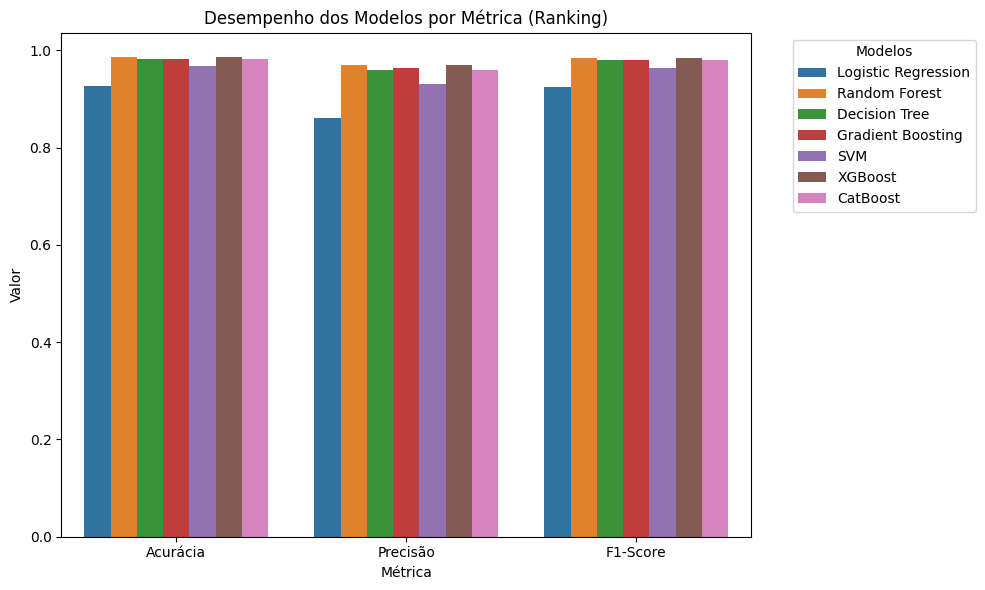

In [ ]:
# Criar ranking dos modelos por métrica
rankings = df.groupby('Métrica').apply(lambda x: x.sort_values(by='Valor', ascending=False).reset_index(drop=True))
rankings = rankings[['Métrica', 'Modelo', 'Valor']]

# Exibir rankings
print(rankings)

# Gráfico de barras do ranking
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Métrica', y='Valor', hue='Modelo')
plt.title("Desempenho dos Modelos por Métrica (Ranking)")
plt.ylabel("Valor")
plt.xlabel("Métrica")
plt.legend(title="Modelos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


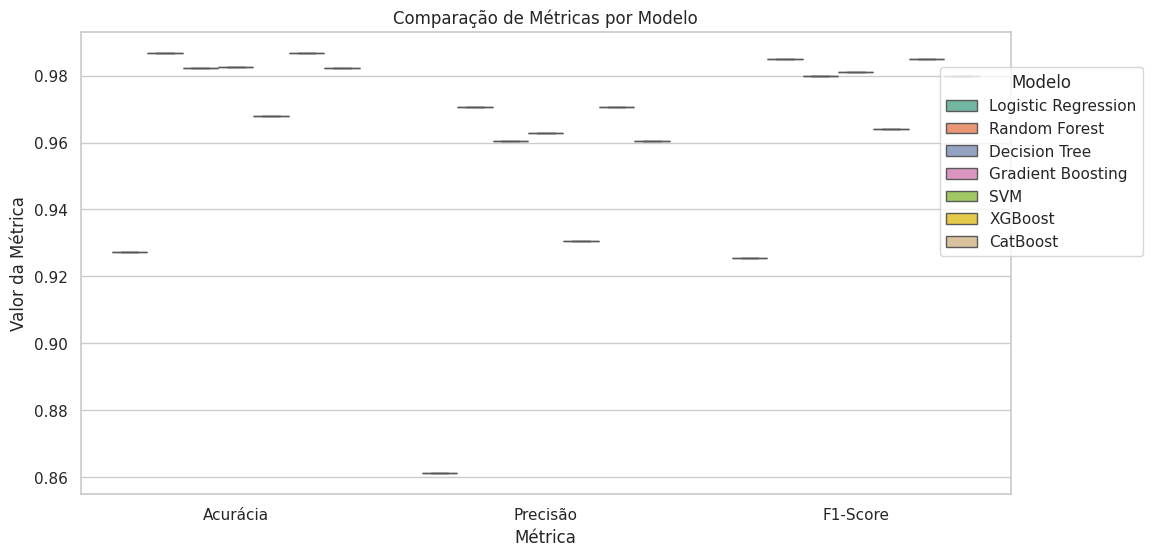

In [ ]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Métrica", y="Valor", hue="Modelo", palette="Set2")
plt.title("Comparação de Métricas por Modelo")
plt.ylabel("Valor da Métrica")
plt.xlabel("Métrica")
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0.5), title="Modelo")
plt.show()


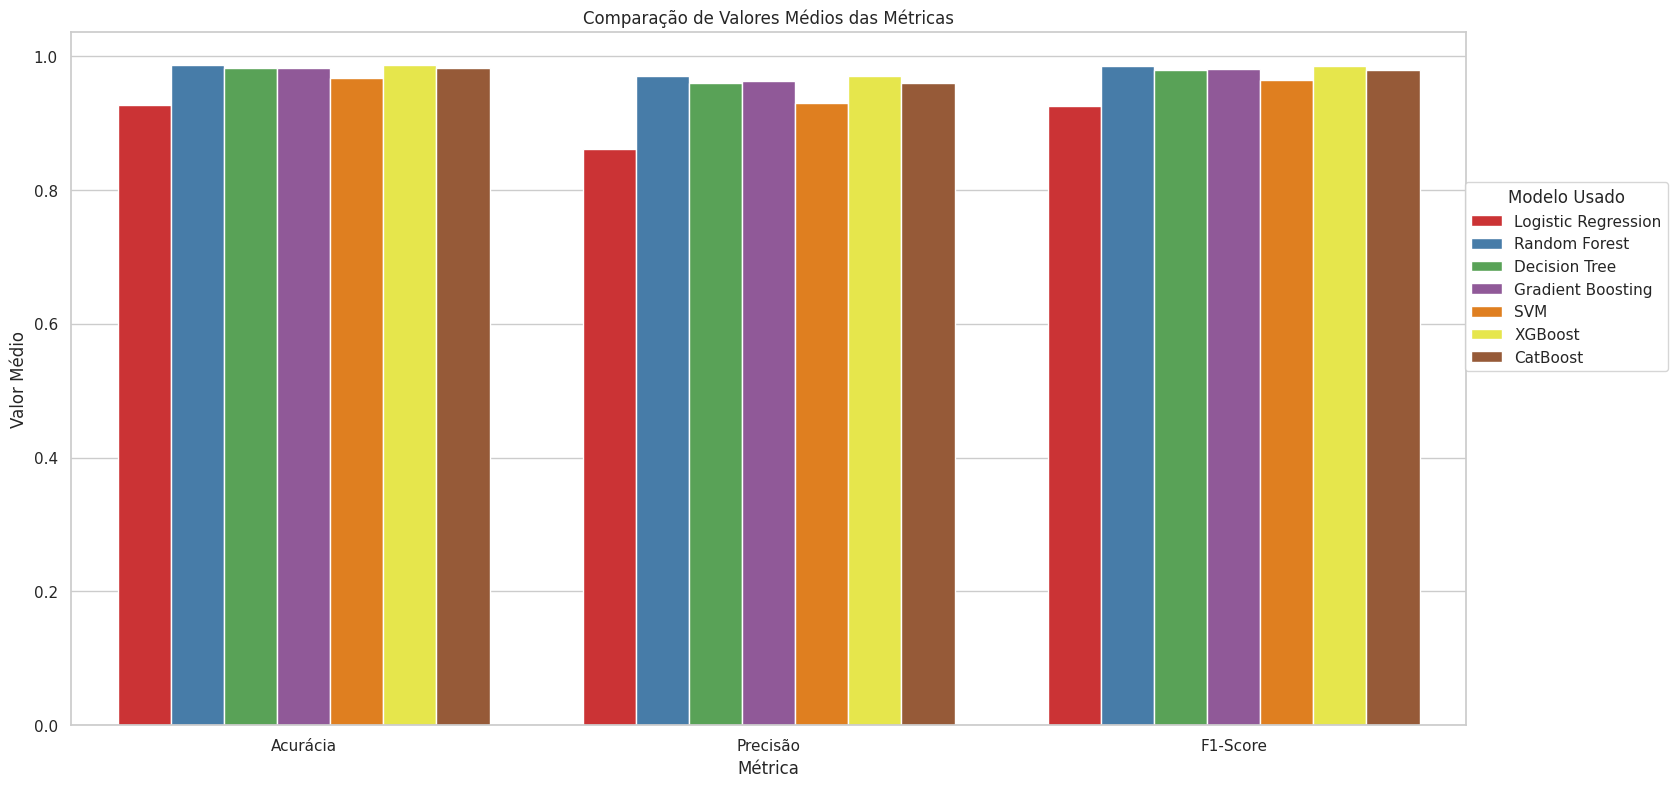

In [ ]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df, x="Métrica", y="Valor", hue="Modelo", errorbar=None, palette="Set1")
plt.title("Comparação de Valores Médios das Métricas")
plt.ylabel("Valor Médio")
plt.xlabel("Métrica")
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0.5), title="Modelo Usado")
plt.show()


<ipython-input-24-c0438beda96b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_auc_roc, x='Modelo', y='AUC-ROC Média', palette='viridis')


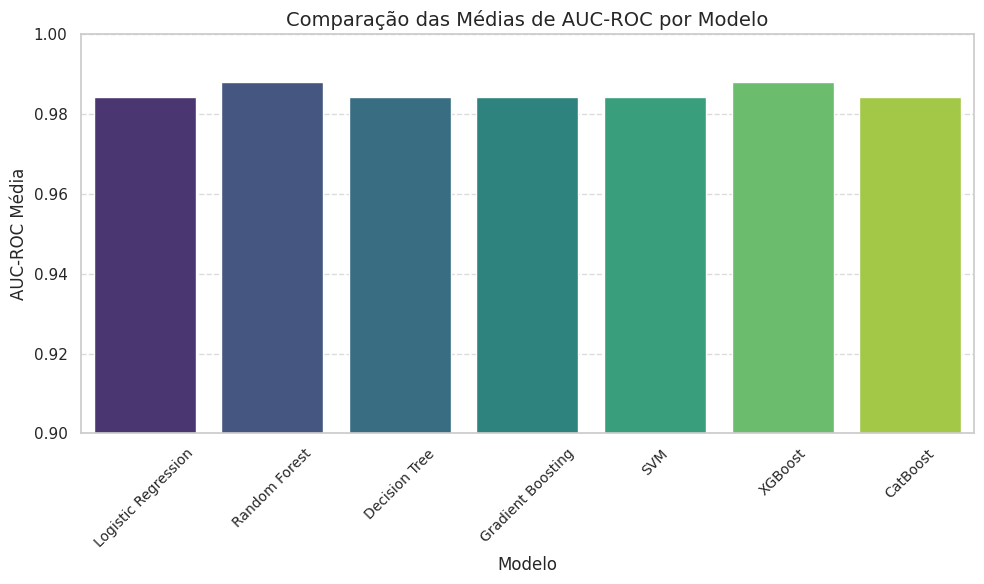

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Valores médios de AUC-ROC para cada modelo
auc_roc_values = {
    'Modelo': [
        'Logistic Regression', 'Random Forest', 'Decision Tree',
        'Gradient Boosting', 'SVM', 'XGBoost', 'CatBoost'
    ],
    'AUC-ROC Média': [0.9842, 0.9881, 0.9844, 0.9842, 0.9844, 0.9881, 0.9844]
}

# Criar um DataFrame para facilitar o uso
df_auc_roc = pd.DataFrame(auc_roc_values)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_auc_roc, x='Modelo', y='AUC-ROC Média', palette='viridis')

# Personalizar o gráfico
plt.title('Comparação das Médias de AUC-ROC por Modelo', fontsize=14)
plt.ylabel('AUC-ROC Média', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0.90, 1.0)  # Ajustar o eixo Y para focar nas diferenças
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
